In [1]:
import sympy
print(sympy.__version__)

1.1.2.dev


In [2]:
!echo $VIRTUAL_ENV

/scratch/avmo/opt/sympy-coordsys


In [3]:
from sympy import *
from sympy.vector import curl, divergence, gradient, CoordSys3D, Del
from sympy.abc import eta, psi, chi, theta, phi
init_printing()

In [4]:
var_names = ['r', r'\theta', r'\phi']
vec_names = ['e_' + v for v in var_names] 

In [5]:
# Default spherical coordinates
R = CoordSys3D('', transformation='spherical', variable_names=var_names, vector_names=vec_names)

# Geophysical convention for spherical coordinates: Parametric equations for transformation
# r = symbols('r')
# x = r * cos(theta) * cos(phi)
# y = r * cos(theta) * sin(phi)
# z = r * sin(theta)
# transformation = ((r, theta, phi), (x, y, z))

# R = CoordSys3D('', transformation=transformation, variable_names=var_names, vector_names=vec_names)

In [6]:
R.lame_coefficients()

In [7]:
# R = CoordSystem3D('', 'spherical', vector_names=['e_r', r'e_\theta', r'e_\phi'], variable_names=['r', r'\theta', r'\phi'])
u1, u2, u3 = symbols('u1:4', type='Function')
f1 = symbols('f', type='Function')
omega1 = symbols(r'\Omega', type='Function')
nabla = Del()
R.i = R.e_r
R.j = getattr(R, vec_names[1])
R.k = getattr(R, vec_names[2])
R.x = R.r
R.y = getattr(R, var_names[1])
R.z = getattr(R, var_names[2])

u = u1(R.x, R.y, R.z) * R.i + u2(R.x, R.y, R.z) * R.j + u3(R.x, R.y, R.z) * R.k
e = eta(R.x, R.y, R.z)

stream = psi(R.y, R.z)
pot = chi(R.y, R.z)

u_r = -curl(R.i * stream).doit()
u_d = gradient(pot).doit()
u_helm = u_r + u_d


# Coriolis term for horizontal velocity ($u_r \to 0 $)

Vertical component of Earth's rotation vector

In [8]:
# f = f1(R.y, R.z)
f = 2 * omega1 * sin(R.y)
# f = 2 * omega1 * cos(R.y)
f

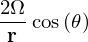

In [18]:
beta = gradient(f).dot(R.j)
beta

In [10]:
vort = curl(u)
vort_r = vort.dot(R.i)
div = divergence(u)

In [11]:
corio = (-f * R.i).cross(u)

In [12]:
corio

## Coriolis term in vorticity equation

$\nabla \times (-f \hat{e}_r \times \bf{u})$ is given by

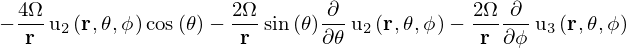

In [13]:
curl(corio).dot(R.i).expand()

Divergence in spherical coordinates is given by:

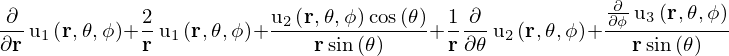

In [14]:
div.expand()

Setting $u_1 = 0$ in the above equation we get the 2D divergence. Which can be separated from the expression for $\nabla \times (-f \hat{e}_r \times \bf{u})$

Therefore linearized vorticity equation can be written as:
$$\partial_t \zeta = -\beta u_\theta - f\nabla . \mathbf{u}$$

## Coriolis term in divergence equation

$\nabla . (-f \hat{e}_r \times \bf{u})$ is given by

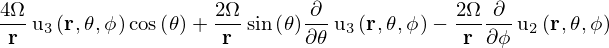

In [15]:
divergence(corio).expand()

Vertical component of vorticity (in the $\hat{e}_r$ direction), $\zeta$ in spherical coordinates is given by:

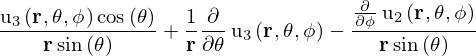

In [16]:
vort_r.expand()

Therefore linearized divergence equation can be written as:
$$\partial_t \nabla.\mathbf{u} = \beta u_\phi + f\zeta - c^2 \nabla^2 \eta $$

## Linearized equations in vorticity-divergence formulation $(\zeta, \delta, \eta)$

$$
\begin{align}
\partial_t \zeta &= -\beta u_\theta - f\delta \\
\partial_t \delta &= \beta u_\phi + f\zeta - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\delta
\end{align}
$$

Projecting the spherical velocities onto the beta plane, $u_\theta \to v$ (y component) and $u_\phi \to u$ (x component)

$$
\begin{align}
\partial_t \zeta &= -\beta v - f\delta \\
\partial_t \delta &= \beta u + f\zeta - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\delta
\end{align}
$$

## Linearized equations in stream function-potential formulation $(\Psi, \Phi, \eta)$

Let stream function and velocity potential be defined as:

$$ \mathbf u = - \nabla \times (\Psi \hat{e}_z) + \nabla \Phi $$

which implies the velocities are given by:

$$u = -\Psi_y + \Phi_x$$
$$v = \Psi_x + \Phi_y$$

and also implies vorticity and divergence to be represented as:
$$\zeta = \nabla^2 \Psi$$
$$\delta = \nabla^2 \Phi$$

$$
\begin{align}
\partial_t \nabla^2 \Psi &= -\beta(\Psi_x + \Phi_y)  - f \nabla^2 \Phi \\
\partial_t \nabla^2 \Phi &= \beta(-\Psi_y + \Phi_x) + f\nabla^2 \Psi  - c^2 \nabla^2 \eta \\
\partial_t \eta &= -\nabla^2 \Phi
\end{align}
$$